### Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.dpi'] = 300


In [2]:
data = np.linspace(-5, 5, 1000)

In [5]:
sigmoid = 1 / (1+np.exp(-(data)))
op_cond = 1 - sigmoid

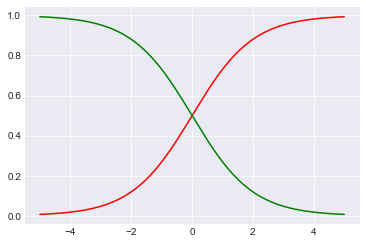

In [7]:
plt.plot(data, sigmoid, color='r', label='Yes')
plt.plot(data, op_cond, color='g', label='No')
plt.show()

In [20]:
h1 = np.random.normal(4, 1, 50)
h2 = np.random.normal(8, 1, 50)
f = np.zeros(50)
p = np.ones(50)

In [21]:
features = np.concatenate([h1, h2]).reshape(-1, 1)
target = np.concatenate([f, p])

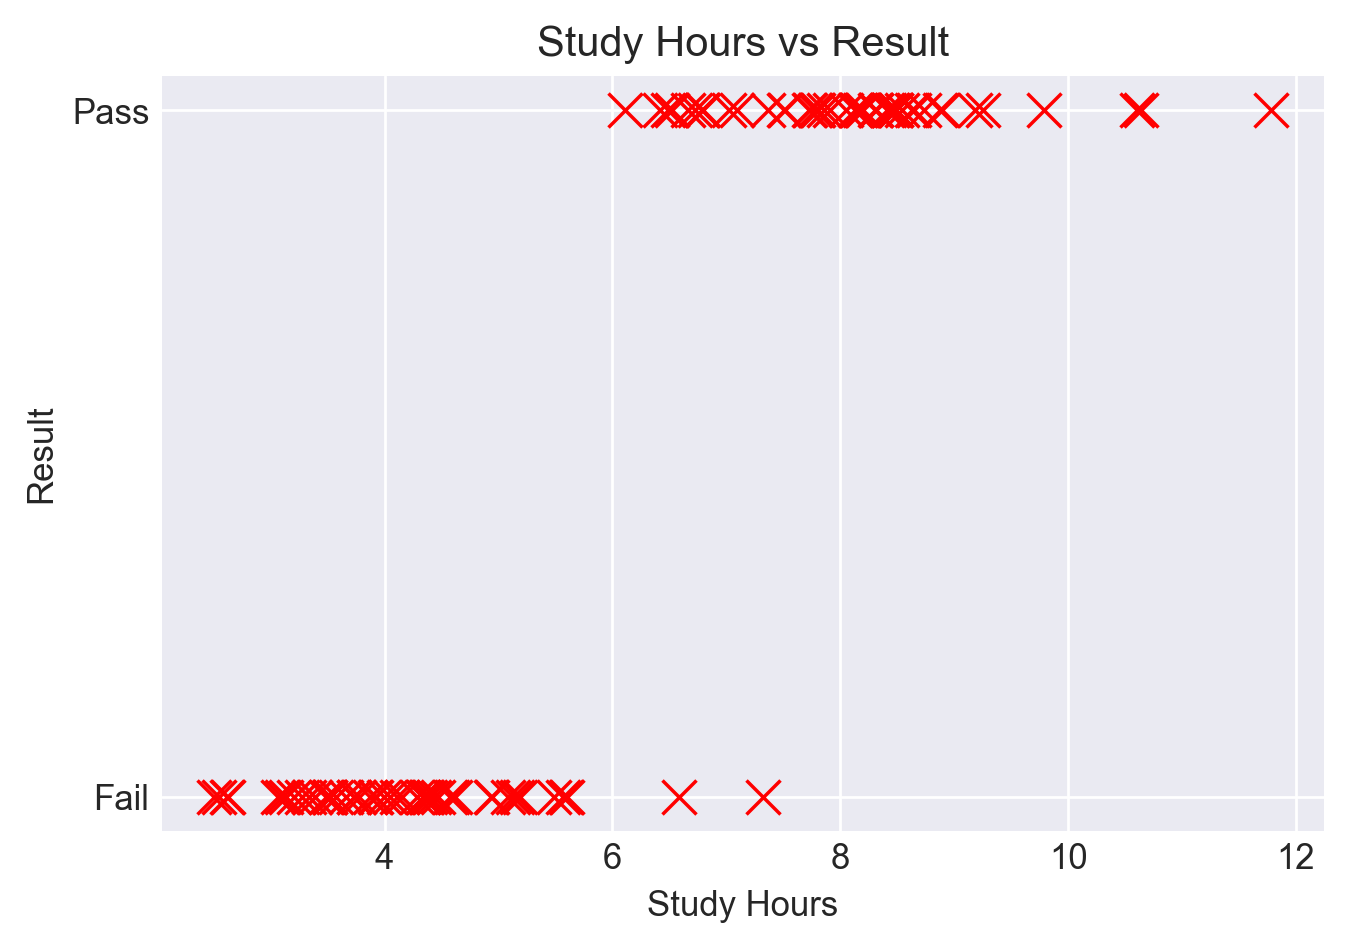

In [22]:
plt.figure(dpi=250)
plt.title("Study Hours vs Result")
plt.xlabel('Study Hours')
plt.ylabel("Result")
plt.yticks([0, 1], ['Fail', 'Pass'])
plt.plot(features, target, 'rx', ms=10)

plt.show()


__step1__ split data into training and testing datasets

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [25]:
features.shape

(100, 1)

__step2__ select a model 

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lin_model = LinearRegression()

__step3__ Learning or Fitting of the model using training dataset

In [28]:
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print(lin_model.coef_, lin_model.intercept_)

[0.19209083] -0.662122692651272


In [30]:
lin_pred = lin_model.predict(X_test)

In [32]:
lin_pred[:5]

array([ 0.13517212,  0.83258111,  0.17795402,  0.40726825, -0.03287049])

In [33]:
y_test[:5]

array([0., 1., 0., 0., 0.])

In [36]:
lin_pred.shape

(25,)

In [35]:
y_test.shape

(25,)

In [39]:
from sklearn.metrics import r2_score
print(f"{r2_score(y_test, lin_pred)*100:.2f}")

72.20


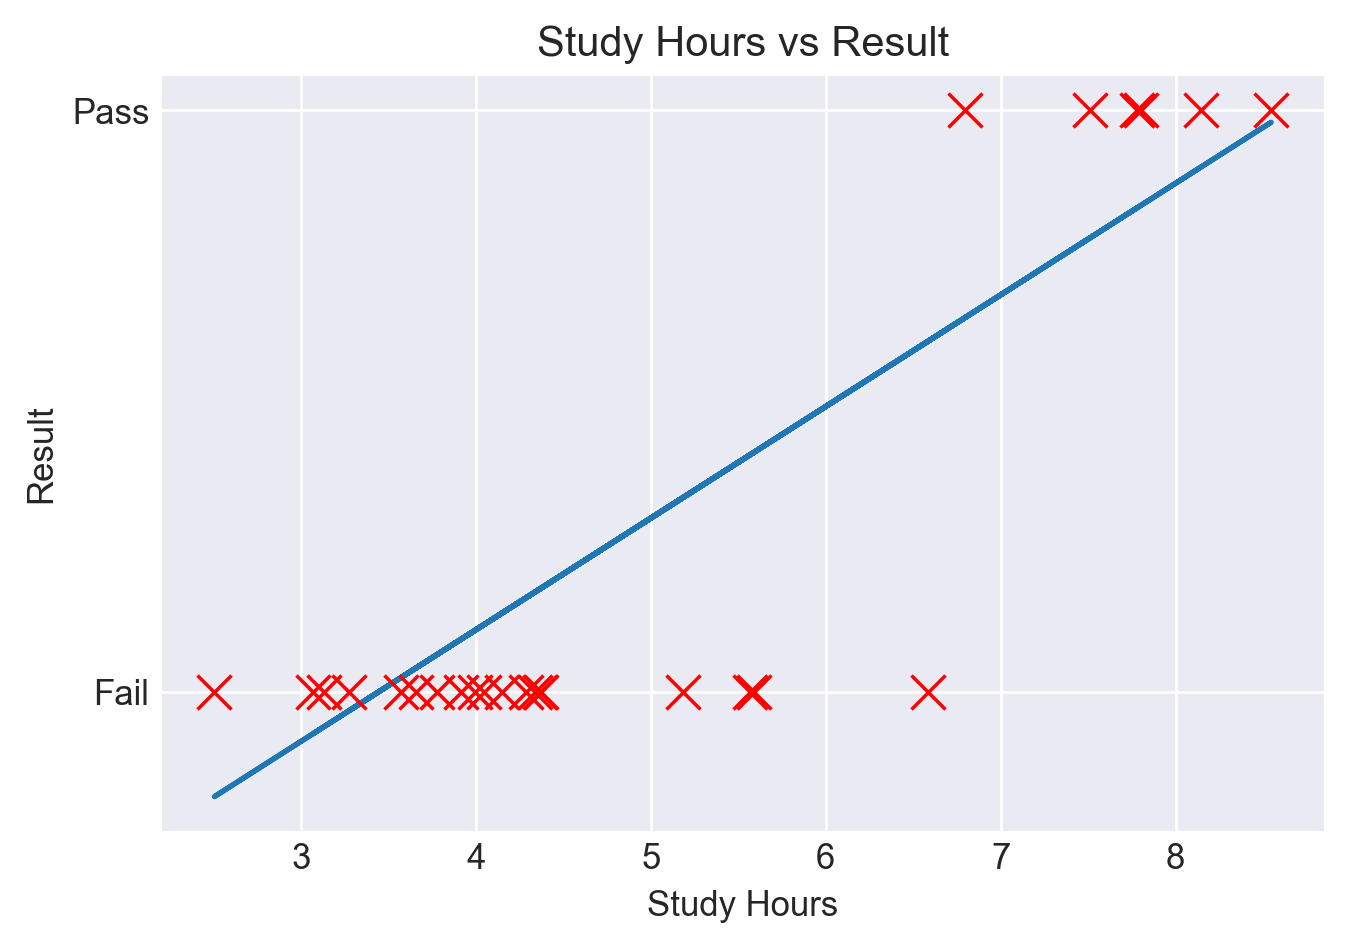

In [40]:
plt.figure(dpi=250)
plt.title("Study Hours vs Result")
plt.xlabel('Study Hours')
plt.ylabel("Result")
plt.yticks([0, 1], ['Fail', 'Pass'])
plt.plot(X_test, lin_pred, label='predicted data')
plt.plot(X_test, y_test, 'rx', ms=10, label='test data')
plt.show()


__Decision Boundary__

In [44]:
lin_pred[lin_pred <= 0.5] = 0
lin_pred[lin_pred != 0] = 1

In [46]:
lin_pred[:5]

array([0., 1., 0., 0., 0.])

In [47]:
y_test[:5]

array([0., 1., 0., 0., 0.])

In [49]:
lin_fpred = lin_model.predict(X_test)

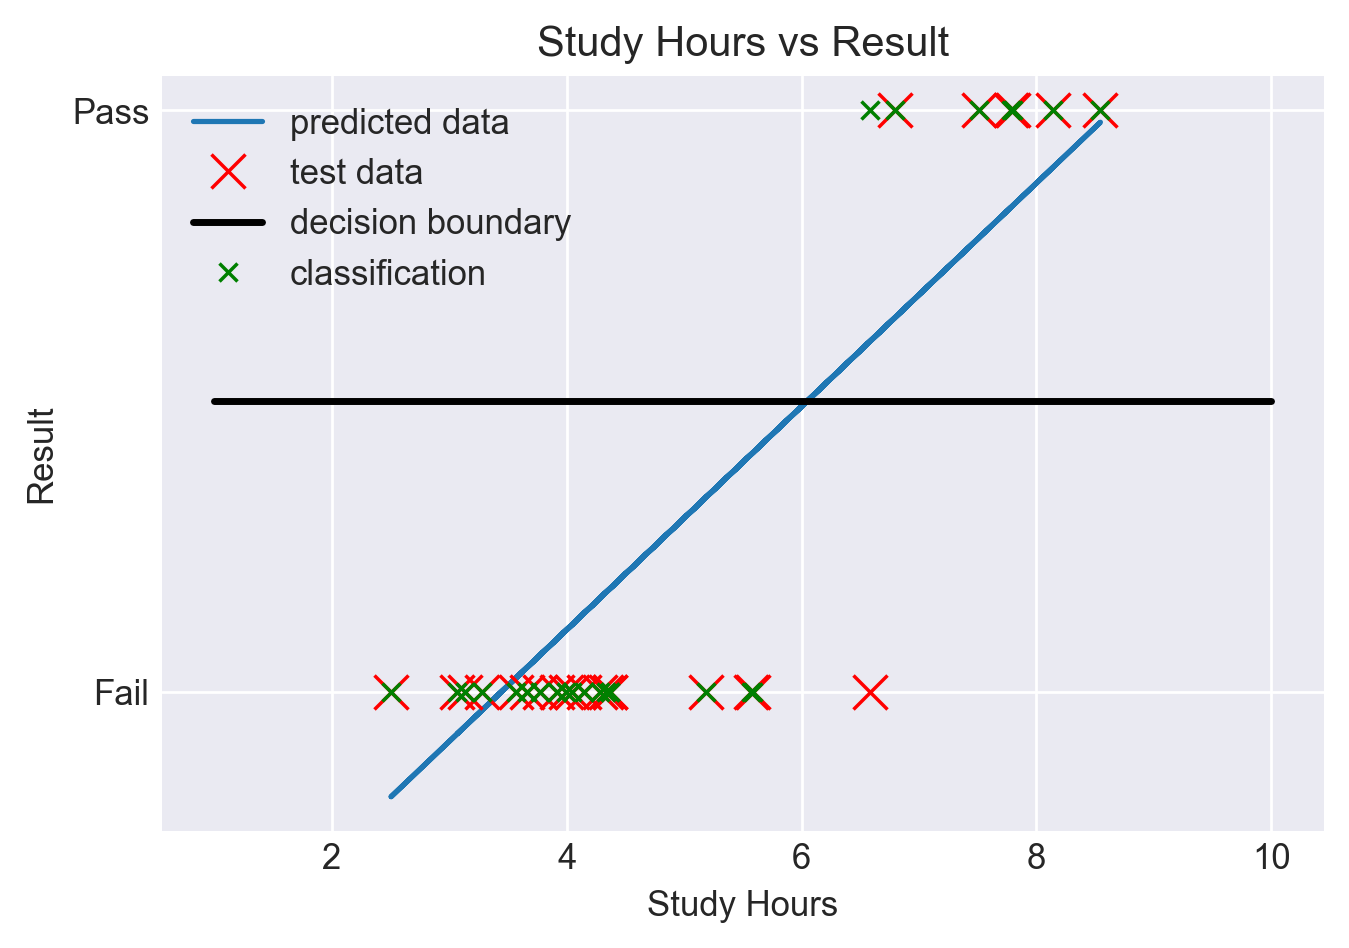

In [54]:
plt.figure(dpi=250)
plt.title("Study Hours vs Result")
plt.xlabel('Study Hours')
plt.ylabel("Result")
plt.yticks([0, 1], ['Fail', 'Pass'])
plt.plot(X_test, lin_fpred, label='predicted data')
plt.plot(X_test, y_test, 'rx', ms=10, label='test data')
plt.plot([1, 10], [0.5, 0.5], 'k-', lw=2, label='decision boundary')
plt.plot(X_test, lin_pred, 'gx', ms=5, label='classification')
plt.legend()
plt.show()


In [55]:
np.sum(y_test)

6.0

In [56]:
np.sum(lin_pred)

7.0

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
log_model = LogisticRegression()

In [60]:
log_model.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
y_pred = log_model.predict(X_test)

In [62]:
y_pred[:5]

array([0., 1., 0., 1., 0.])

In [63]:
y_test[:5]

array([0., 1., 0., 0., 0.])

In [65]:
prob = log_model.predict_proba(X_test)

In [66]:
prob.shape

(25, 2)

In [67]:
prob[:5]

array([[0.69427285, 0.30572715],
       [0.14896045, 0.85103955],
       [0.65992282, 0.34007718],
       [0.45517809, 0.54482191],
       [0.80810161, 0.19189839]])

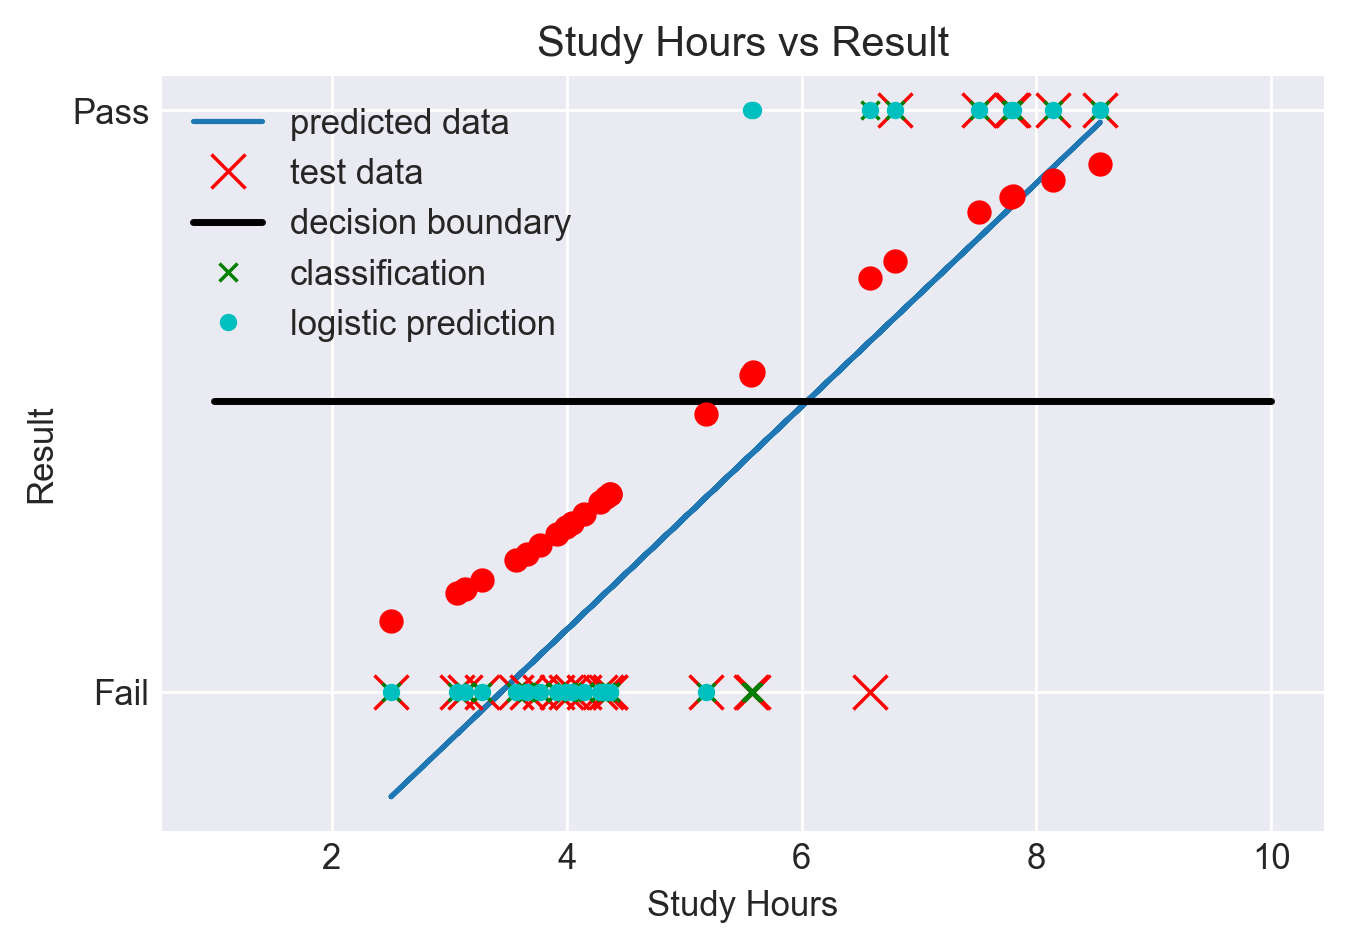

In [71]:
plt.figure(dpi=250)
plt.title("Study Hours vs Result")
plt.xlabel('Study Hours')
plt.ylabel("Result")
plt.yticks([0, 1], ['Fail', 'Pass'])
plt.plot(X_test, lin_fpred, label='predicted data')
plt.plot(X_test, y_test, 'rx', ms=10, label='test data')
plt.plot([1, 10], [0.5, 0.5], 'k-', lw=2, label='decision boundary')
plt.plot(X_test, lin_pred, 'gx', ms=5, label='classification')
plt.plot(X_test, y_pred, 'oc', ms=4, label='logistic prediction')
plt.plot(X_test, prob[:, 1], 'ro')
plt.legend()
plt.show()


In [72]:
nw = [ [6.8], [7.8], [2.5], [9.5]]

In [73]:
log_model.predict(nw)

array([1., 1., 0., 1.])

#### you have to create project on logistic regression supervised classfication technique to predict wheather a credit card transcation is fraud or not 

In [74]:
iris = sns.load_dataset('iris')

In [75]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [76]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [77]:
target = iris['species'].map({
    'setosa': 0, 'versicolor': 1, 'virginica': 2
})

In [80]:
target[:5]

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [82]:
features = iris.iloc[:, :4]

In [83]:
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [87]:
model = LogisticRegression(multi_class='multinomial',
                          solver= 'lbfgs')

In [88]:
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [89]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
y_pred = model.predict(X_test)

In [91]:
y_pred

array([0, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 2], dtype=int64)

In [94]:
print(round(r2_score(y_test, y_pred)*100, 2))

95.96


sepal length - ?

sepal width  - ?

petal length - ?

petal width  - ?

output - setosa ? versicolor ? verginica ? 

In [95]:
ob = [ [2.5, 1.5, 3.5, 1.3]  ]

In [96]:
model.predict(ob)

array([1], dtype=int64)

1 means Versicolor

    Navie Bays, Decision Tree, Random Forest, SVM

#### Recommandations

    k-Nearest Neighbours